In [1]:
#Lets look at some election data!

#imports
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import cross_validation, metrics, preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import style

style.use('ggplot')

#Read in data
polls = pd.read_csv('presidential_polls.csv')

#Drop data based on feature importances - below
polls.drop(['cycle', 'branch', 'timestamp', 'url', 'multiversions', 'startdate', 'matchup', 'rawpoll_mcmullin', 'poll_id', 'createddate'], axis = 1, inplace = True)

#Replace NaN with -99999
polls.fillna(value = -99999, axis = 1, inplace = True)

print(polls.head(5))

         type forecastdate     state     enddate                  pollster  \
0  polls-plus      11/1/16      U.S.  10/31/2016   Google Consumer Surveys   
1  polls-plus      11/1/16      U.S.  10/30/2016  ABC News/Washington Post   
2  polls-plus      11/1/16  Virginia  10/30/2016  ABC News/Washington Post   
3  polls-plus      11/1/16   Florida  10/24/2016                 SurveyUSA   
4  polls-plus      11/1/16      U.S.  10/25/2016       Pew Research Center   

  grade  samplesize population   poll_wt  rawpoll_clinton  rawpoll_trump  \
0     B     24316.0         lv  6.139129            37.69          35.07   
1    A+      1128.0         lv  4.197292            45.00          46.00   
2    A+      1024.0         lv  3.876856            48.00          42.00   
3     A      1251.0         lv  3.403096            48.00          45.00   
4    B+      2120.0         rv  3.394646            46.00          40.00   

   rawpoll_johnson  adjpoll_clinton  adjpoll_trump  adjpoll_johnson  \
0  

In [2]:
#Lets preprocess the data and see what is the most important predictor of election results

#Quick function to turn non-numeric data to numeric - expanded (non-binary) one-hot encoder
def handle_non_numeric_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

data = handle_non_numeric_data(polls)

#Instantiate
y_vect = []

#Build y vector: 1 (correct), if predicted Trump, 0 if Clinton
for i in range(polls.shape[0]):
    if polls.adjpoll_clinton[i] > polls.adjpoll_trump[i] or polls.rawpoll_clinton[i] > polls.rawpoll_trump[i]:
        y_vect.append(0)
    else:
        y_vect.append(1)
        
#Define X and y        
X = data
y = y_vect

#Instantiate and fit model for feature importances
model = ExtraTreesClassifier()
model.fit(X, y)

#Show sorted feature importances
feat_imp = list(zip(X.columns.values, model.feature_importances_))
feat_imp.sort(key=lambda x: x[1])

print(feat_imp)

[('forecastdate', 0.0), ('type', 0.00087831090745094792), ('adjpoll_mcmullin', 0.0062821470689903179), ('population', 0.0071213911375552098), ('poll_wt', 0.011940948011578962), ('enddate', 0.014973643552564217), ('adjpoll_johnson', 0.016665357891381162), ('rawpoll_johnson', 0.018299871113527204), ('grade', 0.020751051006076347), ('question_id', 0.022679626685322786), ('pollster', 0.025469274382001354), ('samplesize', 0.029336620599590007), ('state', 0.054154148206761024), ('rawpoll_trump', 0.14886933443919478), ('rawpoll_clinton', 0.17559310759519775), ('adjpoll_trump', 0.2162832918801684), ('adjpoll_clinton', 0.23070187552263949)]


In [ ]:
# So what did we just do?
# Preprocessed the data, then, we found the most important features that predicted the winner
# The most important features are the polls, no surprise there

In [4]:
#Lets build a model

#Split data into training dataset and testing dataset
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y)

#Instantiate, fit and predict classification model
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
#
y_pred_class = dt.predict(X_test)

#Compare predicted classifications to actual classifications
print(metrics.accuracy_score(y_test, y_pred_class))


0.99218444705


In [ ]:
#Wow! 99% accuracy using this data to predict the election winner, I guess hindsight is 20/20

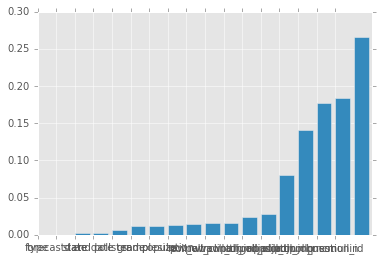

In [25]:
#Hard to see but lets plot feature importances as a bar graph

sorted_feat_imp = [x[1] for x in feat_imp]

ind = np.arange(len(feat_imp))
width = 1

%matplotlib inline
#Plot feature importances in bar graph
plt.bar(ind+width, sorted_feat_imp)
plt.xticks(range(len(feat_imp)), polls.columns.values)
plt.show()

In [12]:
#You know, there was a lot of talk of the 'silent majority' - let's see what happens when we remove 
#the trump polls

polls = pd.read_csv('presidential_polls.csv')
#Drop data based on feature importances - below and now drop trump
polls.drop(['rawpoll_trump','adjpoll_trump','cycle', 'branch', 'timestamp', 'url', 'multiversions', 'startdate', 'matchup', 'rawpoll_mcmullin', 'poll_id', 'createddate'], axis = 1, inplace = True)

#Replace NaN with -99999
polls.fillna(value = -99999, axis = 1, inplace = True)
data_1 = handle_non_numeric_data(polls)

#Redefine X
X = data_1
#y is the same

#Split data into training dataset and testing dataset
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y)

#Instantiate, fit and predict classification model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_class = dt.predict(X_test)

#Compare predicted classifications to actual classifications
print(metrics.accuracy_score(y_test, y_pred_class))

0.971082454084


In [29]:
#Hmm not much of a decline in accuracy - around 97%.

In [48]:
#Lets see how well the last 9500 polls predicted the most recent 500 polls

X_train = X.iloc[500:, :]
X_test= X.iloc[:500, :]
y_train = y[500:]
y_test = y[:500]
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_class = dt.predict(X_test)

#Compare predicted classifications to actual classifications
print(metrics.accuracy_score(y_test, y_pred_class))

0.805361544782


In [14]:
#We've dropped from 95% accuracy to 80%, if we consider the "silent majority" and use the historic data as 
#training data and test on the most recent data.

In [50]:
# What if we look closer in time? Let's use the last 9900 data points to predict the most recent 100

X_train = X.iloc[100:, :]
X_test= X.iloc[:100, :]
y_train = y[100:]
y_test = y[:100]
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_class = dt.predict(X_test)

#Compare predicted classifications to actual classifications
print(metrics.accuracy_score(y_test, y_pred_class))

0.576065509077


In [ ]:
# Woah! Now we are down to 55% accuracy.  (Even though we trained on more data, so we should have a better model)

# This has certainly been an unpredictable election - and the most recent trends certainly changed from historical data 

In [ ]:
#In this election, it was all about the very, very thin margin and not relying on historical data.

#Losing the Trump poll data didn't change too much but using older data to predict new data changed a lot!

#I'll leave it at this for now but as more detailed data comes in, maybe we can make more sense of it.